[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lisuex/Machine-Learning2025/blob/main/Lab03.ipynb)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the data and divide them into train and test datasets
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model and train it on the chosen data
model = LogisticRegression()
model.fit(X_train, y_train)

y_val_probs = model.predict_proba(X_val)[:, 1]
y_test_probs = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


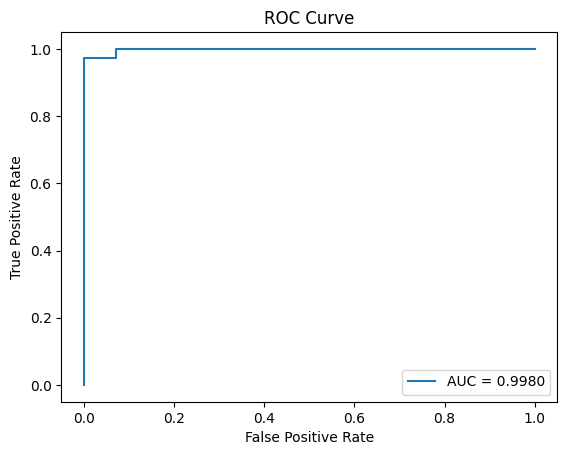

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot the ROC curve which is curve showing the ratio between TPR(True Positive Rate) and FPR(False Positive Rate) for different thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
# Calculate the AUC which is the area under the ROC curve. The closer it gets to 1, the better the model is
auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [23]:
# Calculate Youden's J statistic which looks for the best threshold.
# "The best" in that case means the biggest difference between TPR and FPR, because we want TPR to be the biggest and FPR to be the smallest
# In perfect scenario TPR=1 and FPR=0 (each classification is perfect)
J = tpr - fpr
optimal_idx = J.argmax()
optimal_threshold = thresholds[optimal_idx]
sensitivity = tpr[optimal_idx]
specificity  = fpr[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 0.85


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Test the model on previously selected testing dataset
y_test_probs = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_probs >= optimal_threshold).astype(int)

# Calculate and show all the metrics that are mentioned in the task
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Sensitivity for chosen threshold = {sensitivity:.4f}")
print(f"Specificity for chosen threshold = {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.92
Precision: 1.00
Recall: 0.88
F1-Score: 0.94
Sensitivity for chosen threshold = 0.9722
Specificity for chosen threshold = 0.0000
Confusion Matrix:
[[38  0]
 [ 9 67]]


**Is a 0.5 threshold always the best choice in Logistic Regression?**

No, it depends on and problem and the data, as you can see in my example, threshold 0,85 was better in terms of Youden's J statistic

**Would a different threshold yield better results?**

trade-off between sensitivity and specificity is presented by the ROC curve
which shows the specificity and sensitivity for different thresholds

**How do you define "better" results**

One way to define it is by Youden's J statistic which maximize
the difference between sensitivity and specificity.
But for different cases the "better results" can be defined differently.
For example, in disease detection it is more import to detect *all* the
"sick" cases and making "mistakes" in detecting sickness in wrong examples is really bad. On the other way, in spam filtering case, it is more important to not put some important email into spam then to leave some not important email in "not spam" section. These examples show that depending on the case, the conflict between sensitivity and specifity can be resolved in different ways.

**How does a ROC curve help in this process**

The ROC curve can help in visualing how the sensitivity and specifity changes for different threshold values, which can help in deciding which threshold is the best for certain case.

**How do you select the optimal threshold using the ROC curve?**

As I wrote before, the most common way of selecting the optimal threshold is to
maximize the difference between TPR and FPR, but depending on the case, you can for example select best threshold that meets the conditions like: " FPR < 0.3 and TPR > 0.8", not always to maximize the difference.

**What is the AUC metric and how is it useful?**

AUC metric calculates the area under the ROC curve.
It can help to evaluate the model. For example, if the model is perfect (there exist a threshold for which TPR=1 and FPR=0) then the AUC=1. If the model behaves randomly, the AUC=~0.5 as it is the value for "perfectly random" model.
When AUC < 0.5, then the model is worse then a random model.